#1. Correlation Coefficient r



#2. Linear Regression

Regression models are a class of statistical models that allows us to test the hypothesis of whether there is a significant relationship between a response variable and some explanatory variable(s). 

That is, given some explanatory variables, you can make predictions about the value of the response variable. 

The **response variable**, the one we want to make predictions on, is also known as the dependent variable or the variable Y. 

The **explanatory variables** are used to explain how the predictions will change, are also known as independent variables or variable X. 

Linear regression is used **when the response variable is continuous (i.e., numeric).**


A regression is a straight line and the line is defined by two properties: 

**The intercept** is the y value, when x is zero. 

**The slope** is the steepness of the line, equal to the amount y increases if x is increased one unit at a time. 



---



**The equation** for a straight line is that the y value is the intercept plus the slope times the x value.

$$Y = intercept + slope * x$$

Writen with the following formula for a hypothesized line:

$$Y =  \beta_0 + \beta_1x$$ 

$\beta_0$ is a constant

$\beta_1$ is the slope

$x$ is the value of independent variable (the predictor)

$Y$ is the value of the dependent variable (the response variable)



---



**Estimating the intercept**. Where the trend line intercept the y axis.

**Estimating the slope**. Calculate the change in y between two points (we calculate the change in x between two points and devide one by the other.

**1. State the hypothesis**

$H_0: b_1 = 0$

$H_a: b_1 \neq 0$

Where $b_1$ is the slope of the regression line




**2. Checking conditions for inference**



*   The dependent variable $Y$ has a linear relationship to the independent variable $X$.
*   Any given x, y is independent
*   y values are approx. normally distributed
*   Check for homoscendasticity: For each value of x, the probability distribution of Y has the same variance ($\sigma$)
*   Check for multicollinearity: predictor variables are independent of each other 
*   Check for autocorrelation: error terms are independent (uncorrelated)










**3. State the significance level**

**4. Calculate the t-test statistic**

We first need to calculate the standard error of the slope.


$s_{e}^2 =\frac {\sum{(y_i -\bar{y_i})}^2} {n-k}$

$\bar{y_i}$ is the predicted value

$y_i$ is the observed value

${n-k}$ is the degrees of freedom

Then, the formula for 

 $t_c =\frac {{b_1 -\beta_1}^2} {S_b1}$

 $s_b1$ = standard deviation of the estimate of $b_1$

 The formula for $S_{b1}$:

 $S_{b1} = \frac {{S_e}^2} {\sqrt{(x_i-\bar{x})^2}}$

 Degrees of freedom:

 $df = n-k -1$  
 
Where $k$ is the number of independent variables and the extra $1$ is subtracted because of the intercept.



**Example**

Nordlys, a utility company, surveys 102 randomly selected customers. For each survey participant, the company collects a quarterly electric bill (in dkk) and home size (in square meters). Table with the output from a regression analysis appears below.

Is there a significant linear relationship between quarterly bill and home size? Use a 0.05 level of significance.

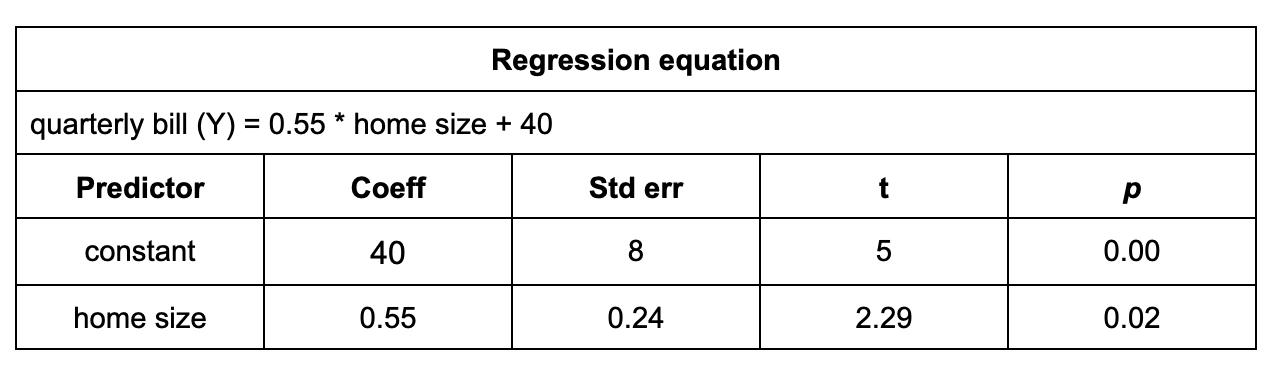

Let's first state the hypotheses.

$H_0$: the slope of the regression is equal to zero. There is no relationship between electric bill and house size. 

$H_a$: the slope of the regression is not equal to zero. There is a relationship between electric bill and house size. 


In this regression output, we get the slope coeffient, $b_1$ = 0.55 and the standard error, $s_{b1}$ = 0.24, for the slope.

We can calculate the t-statistic by $\frac{b_1}{s_{b1}}$ = $\frac{0.55}{0.24}$ =2.29

and the degrees of freedom: $n-k$, in this case, 102 - 2 = 100

When we look up the t statistic using 100 degrees of freedom, we find that the critical t-value is 1.984 at $\alpha$ = 0.05 and $p$-value of t = 2.29 is therefore lower.

Given that the p-value is lower than the significance level $\alpha$ = 0.05, we reject the $H_0$ hypothesis that there is no relationship between electricity bill and home size.

**Tasks of the day:**

1.   We'll visualize and fit linear regressions
2.   We'll make predictions with them
3. We'll determine whether the model is a good fit


---







Different packages are used to run regression models. Statsmodes is a popular choice. 

**1a. Visualizing linear regressions**

In [ ]:
#visualizing regressions

import seaborn as sns
import panda as pd
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x = 'predictor_variable', y='response_variable', data = dataframe)

# Show the plot
plt.show()





In seaborn,  the **regplot() function** adds a trend line calculated using linear regression. Also, by default, regplot() adds a confidence interval around the line, this can be helpful, but can also removed by setting the $ci$ argument to "None", in case, like now, when we're mostly interested in the reg line. 

In [ ]:
# Draw a trend line on the scatter plot 
sns.regplot(x="predictor_variable",
            y="response_variable",
            data=dataframe,
            ci=None,
            scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

**1b. Fitting linear regressions:**

**The function**

The python function ols() takes two arguments. 



*   The first argument is a formula: the response variable is written to the left of the tilde, and the explanatory variable is written to the right. 
*   The data argument takes the DataFrame containing the variables.
*   To actually fit the model, we add .fit()  to the created model object. 
*   Print the resulting model, using the params attribute.


This will result in two coefficients. 

These coefficients are the intercept and slope of the straight line. 

How do we interpret these?

For every additional x-value, we expect the total y to increase by what factor.


In [ ]:
#Running a regression with continuous predictor

from statsmodels.formula.api import ols

regression = ols("response_variable ~ predictor", data = DataFrame)

#Fitting a regression
regression = regression.fit()

# Print the parameters of the fitted model
print(regression.params)


In [ ]:
# Running a regression with categorical predictor

# Visualizing the data
#we draw a histogram for each of the "categories". 
#Displot creates histograms.
#Displot takes a DataFrame as the data argument: the variable of interest as x, and the variable used to split on as col.
#To give a separate panel to each type,an optional col_wrap argument can be used (= number of plots per row). 
#It can be helpful to set the bins argument, how many bins are appropriate for this dataset? 

import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data = DataFrame, x = "cat_predictor", col = "type", col_wrap = 2, bins = 5)
plt.show()

#group categorical variable and calculate means

summary_stats = dataframe.groupby("cat_predictor")["response"].mean()
print(summary_stats)

#Linear regression using "response" as response variable
#"predictor" as the explanatory variable

From statsmodels.formula.api import ols
cat_reg_model = ols("response ~ cat_predictor", data = dataframe).fit()
print(cat_reg_model.params)

#A coefficient for a level in the categorical variable is missing, but the number for the intercept looks familiar. 
#The intercept is the mean of one the predictor levels, we just calculated. 
#But what are the other coefficients then, how do their coefficient relate? 
#If it does not make sense, fortunately, we can fix it.

#By changing the formula slightly to append "plus zero", we specify that all the coefficients should be given relative to zero. 
#This means we are fitting a linear regression without an intercept term.
#however, in case of a single categorical variable, the coefficients are simply the means.

reg_model_zero = ols("response ~ cat_predictor + 0", data = datframe).fit()
print(reg_model_zero.params)



**2. Making predictions**



We call ols with (1) a formula and (2) the dataset, after which we add .fit(). 

The response variable goes on the left-hand side of the formula, and the explanatory variable goes on the right. 

We need to assign the result to a variable, so we can reuse it later on. 

To view the coefficients of the model, we can use the params attribute in a print call (like above).



In [ ]:
reg_model = ols("response ~ predict", data = dataframe).fit()
print(reg_model.params)

The next step is to choose some values for the explanatory variables. To create new explanatory data, we store our explanatory variables in a new pandas DataFrame. The goal is to create a DataFrame that contains both the explanatory variable and the predicted response. 

Now this can allow us to answer questions that go beyond what the original dataset allows us to do (= make predictions). 



*   We specify an interval of values using the np.arange function, taking the start and end of the interval as arguments. Note that the end of the interval, does not include this value.
*   Then, call predict() on the model, passing the dataframe with the explanatory variables as the argument.
*   The predict function returns a series of predictions, one for each row of the explanatory data.










In [ ]:
#Example:

import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'predictor': np.arange(0, 11)}) #values 1-10

# Use "model" to predict with explanatory_data, call it response_var
response_var = model.predict(explanatory_data)

#we start with the existing column, explanatory_data. 
#Then, we use the pandas .assign() to add a new column, named after the response variable, response. 

# Create prediction_data
prediction_data = explanatory_data.assign(response_var = response_var)

# Print the result
print(prediction_data)

Working with model objects, what are they?

**.fittedvalues attribute** - "Fitted vallues" are predictions on the original dataset used to create the model.

**.resid attribute** - are a measure of inaccuracy in the model fit. Like fitted values, there is one residual for each row of the dataset. Each residual is the actual response value minus the predicted response value.

**.summary()**

In [ ]:
print(model.params)
print(model.fittedvalues) #equal to print(model.predict(explanatory_data))
print(model.resid) 
model.summary()

In [ ]:
# Get the coefficients of mdl_price_vs_conv
coeffs = model.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
reg = intercept + slope * explanatory_data
print(reg)

# Compare to the results from .predict()
print(reg.assign(predictions_auto=reg_model.predict(explanatory_data)))

**3. Assessing model fit**

How good is our model?

The **coefficient of determination**, also called r-squared. Either written with a lower case r for simple linear regression and an upper case R when there are several explanatory variables. 

$ r^2$ is defined as the proportion of the variance in the response variable that is predictable from the explanatory variable. 

A score of $1$ means the model has a perfect fit, and a score of $0$ means the model is no better than randomness. 

For simple linear regression, the interpretation of the coefficient of determination is straightforward. It is simply the correlation between the explanatory and response variables, squared. ( .rsquared attribute in python)

What is a good $ r^2$? It depends on what your studying.

In [ ]:
#correlation squared
coeff_determination = variable["x"].corr(variable["y"]) ** 2
print(coeff_determination)

In [ ]:
reg_model = ols("y ~ x", data = dataframe).fit()
print(reg_model.summary())
print(reg_model.rsquared)

Another way to assess model fit is through **the residual standard error, or RSE**. RSE tells us how much predictions are typically wrong.

Specifically, each residual is the difference between a predicted value and an observed value. 

The **mean squared error, or MSE**, is the squared residual standard error. We can calculate the RSE by taking the square root of MSE. 

$MSE = RSE^2$

In [ ]:
mse = reg_model.mse_resid
print('mse:', mse)

#Calculating rse
rse = np.sqrt(mse)
print("rse:", rse)

**Calculating RSE**
**need to do a math example...**

(1) Square each residual, take the sum of them.

(2) calculate the degrees of freedom of the residuals. The number of observations - the nunber of model coefficients

(3) take the square root of the ratio of these numbers. 



In [ ]:
#Calculating RSE

residuals_sq = reg_model.resid ** 2
residual_sum_of_sq = sum(residuals_sq)
deg_freedom = len(dataset.index) - 2
rse = np.sqrt(resid_sum_of_sq/deg_freedom)

print("resid sum of sq: ", resid_sum_of_sq)
print("deg freedom: ", deg_freedom)
print("rse:", rse)

Root-mean-square error (RMSE) performs the same task as residual standard error, namely quantifying how inaccurate the model predictions are. 

In [ ]:
#Calculating RMSE
# Important: RMSE does not account for the number of coefficients, worse for comparisions of models

residuals_sq = reg_model.resid ** 2
residual_sum_of_sq = sum(residuals_sq)
n_obs = len(dataset.index)
rmse = np.sqrt(resid_sum_of_sq/n_obs)

print("rmse:", rmse)